# Pose detection notebook - Golf swing

* Introduction
* Import libraries
* Download video 
* Setup model
* Detect key points and draw the skeleton


## Introduction

This notebook perfoms the following tasks :
* Import the libraries needed for the task
* Download the video and capture the images for the pose detection
* Setup the model required for the task
* Read and prepare the image for the network
* Detect key points and draw the skeleton


## Import libraries

In [2]:
#import pytube
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print('packages imported with success ...')

packages imported with success ...


## Download video

Request youtube video with pytube package. The video is saved to 'video' folder. The function request_Images capture one image every 0.5 seconds.
Only the images have been stored in the git repository.

In [11]:
def request_video(url,PATH):
    youtube = pytube.YouTube(url)
    video = youtube.streams.get_highest_resolution()
    video.download(PATH)

def get_filepath():
    for root, dirs, files in os.walk(PATH):
        for filename in files:
            return filename

def request_Images(frameRate):
    
    vidcap = cv2.VideoCapture(PATH+filename)
    def getFrame(sec):
        vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
        hasFrames,image = vidcap.read()
        if hasFrames:
            cv2.imwrite(path_video + "image_V05_"+str(count)+".jpg", image) 
            print("image_V05_"+str(count)+".jpg" " extracted")   
        return hasFrames

    sec = 0
    frameRate = frameRate 
    count=1
    success = getFrame(sec)
    while success:
        count = count + 1
        sec = sec + frameRate
        sec = round(sec, 2)
        success = getFrame(sec)    
    

url='https://www.youtube.com/watch?v=VZjg0KzKMPU'
PATH='./videos/'
request_video(url,PATH)
filename = get_filepath()
frameRate = 2 
get_Images(frameRate)

## Set up the pose detection model

The model from openpose project has been selected.https://cmu-perceptual-computing-lab.github.io/openpose/web/html/doc/index.html

The pose output format BODY_25 has been choose. This format takes in account the hips connections, essential for the golf swing. Some modifications have been done regarding the connection for the best movement representation. The face points and connection have been removed.



In [3]:
#set up the key points
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
              "LShoulder": 5, "LElbow": 6, "LWrist": 7, "MidHip": 8, "RHip": 9,
              "RKnee": 10, "RAnkle": 11, "LHip": 12, "LKnee": 13, "LAnkle": 14,
              "REye":15,"LEye":16,"REar": 17, "LEar": 18,"LBigToe":19,
              "LSmallToe":20, "LHeel":21, "RBigToe":22, "RSmallToe":23,
              "RHeel":24, "Background":25}

#set up the connections between the keypoints
POSE_PAIRS = [["Neck","RShoulder"],
              ["RShoulder","RElbow"],
              ["RElbow","RWrist"],
              ["Neck","LShoulder"],
              ["LShoulder","LElbow"],
              ["LElbow", "LWrist"],
              ["Neck","MidHip"],
              ["MidHip","RHip"],
              ["RHip","RKnee"],
              ["RKnee","RAnkle"],
              ["MidHip","LHip"],
              ["LHip","LKnee"],
              ["LKnee","LAnkle"]]

#load the model
net = cv2.dnn.readNetFromCaffe('./models/BODY_25/pose_deploy.prototxt','./models/BODY_25/pose_iter_584000.caffemodel')

print('The model has been setup correctly ...')

The model has been setup correctly ...


## Read and prepare the image for the network

In [ ]:
#read the image and prepare the image for the network
path = './video/image_85.jpg'
frame = cv2.imread(path)
blob = cv2.dnn.blobFromImage(frame, 1.0/255, (368, 368), (104, 117, 123),swapRB=False, crop=False)

#Set the input blob to the network
net.setInput(blob)
out = net.forward()

## Detect key points and draw the skeleton

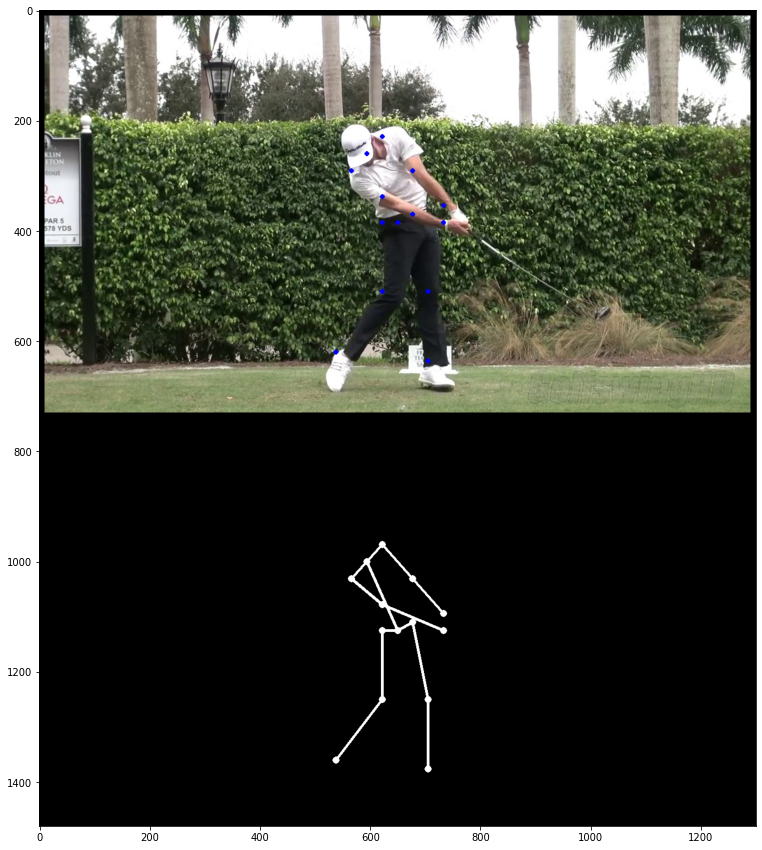

In [51]:
points = []
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]

# Detection of the keypoint
for i in range(len(BODY_PARTS)):
    heatMap = out[0, i, :, :]
    _, conf, _, point = cv2.minMaxLoc(heatMap)
    x = (frameWidth * point[0]) / out.shape[3]
    y = (frameHeight * point[1]) / out.shape[2]

    points.append((int(x), int(y)) if conf > 0.1 else None)

    black_image =  np.zeros(shape=[frame.shape[0],frame.shape[1], 3], dtype=np.uint8)  

# Draw Skeleton    
for pair in POSE_PAIRS:
    partFrom = pair[0]
    partTo = pair[1]

    assert(partFrom in BODY_PARTS)
    assert(partTo in BODY_PARTS)

    idFrom = BODY_PARTS[partFrom]
    idTo = BODY_PARTS[partTo]

    if points[idFrom] and points[idTo]:
        
        cv2.ellipse(frame, points[idFrom], (4, 4), 0, 0, 360, (255,0, 0), cv2.FILLED)
        cv2.ellipse(frame, points[idTo], (4, 4), 0, 0, 360, (255,0, 0), cv2.FILLED)
        cv2.ellipse(black_image, points[idFrom], (6, 6), 0, 0, 360, (255,255, 255), cv2.FILLED)
        cv2.ellipse(black_image, points[idTo], (6, 6), 0, 0, 360, (255,255, 255), cv2.FILLED)
        cv2.line(black_image, points[idFrom], points[idTo], (255, 255, 255), 3)

frame_final=cv2.copyMakeBorder(frame,10,10,10,10,cv2.BORDER_CONSTANT)
black_image_final = cv2.copyMakeBorder(black_image,10,10,10,10,cv2.BORDER_CONSTANT)
final_img = cv2.vconcat([frame_final, black_image_final])

#plot the figure -Image and key points and the Skeleton
fig = plt.figure()
fig.set_size_inches(15,15)
final_img_RGB = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
plt.imshow(final_img_RGB)

   